In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
save_images = False
sep = ","
enc = "utf-8"
file = "fh04_vary_k.csv"
df = pd.read_csv(file, sep=sep, header=0, encoding=enc)

In [3]:
k_params = [0.001, 0.1, 1, 2, 10, 100]
dfs = []
for k_param in k_params:
    tmp_df = df[df["K"] == k_param]
    dfs.append(tmp_df)

In [4]:
def plot_alg_box(dfs, k_params, feat="OOA", suffixes=["FH04"], ylabel=None,
        print_latex=False, ylim=None, figsize=(12,8), yticks=None, float_format="%.2f"):
    col_names = []
    title = feat
    for i in range(len(suffixes)):
        suffix = suffixes[i]
        col_name = feat + "_" + suffix
        col_names.append(col_name)
    sub_dfs = []
    for i in range(len(dfs)):
        df = dfs[i]
        sub_df = df.loc[:, col_names]
        sub_df.columns = [str(k_params[i])]
        sub_dfs.append(sub_df)
    sub_df = pd.concat(sub_dfs, axis=1)
    if print_latex:
        df_desc = sub_df.describe(include="all")
        df_desc = df_desc.loc[["mean", "std", "25%", "50%", "75%"]]
        latex_str = df_desc.to_latex(escape=False, float_format=float_format)
        latex_str = latex_str.replace("_", "\_")
        latex_str = latex_str.replace("%", "\%")
        latex_str = latex_str.replace("|S|", "$|\mathcal{S}|$")
        
        print(latex_str)
    
    sub_df.plot(kind="box", figsize=figsize, rot=90, title=title, grid=True,
        showmeans=True, ylabel=ylabel, ylim=ylim, yticks=yticks)

\begin{tabular}{lrrrrrr}
\toprule
{} &  0.001 &  0.1 &    1 &    2 &   10 &  100 \\
\midrule
mean &   0.85 & 0.80 & 0.78 & 0.78 & 0.77 & 0.77 \\
std  &   0.06 & 0.07 & 0.08 & 0.08 & 0.08 & 0.08 \\
25\%  &   0.82 & 0.76 & 0.73 & 0.73 & 0.72 & 0.72 \\
50\%  &   0.86 & 0.81 & 0.78 & 0.78 & 0.77 & 0.77 \\
75\%  &   0.89 & 0.85 & 0.83 & 0.83 & 0.82 & 0.82 \\
\bottomrule
\end{tabular}



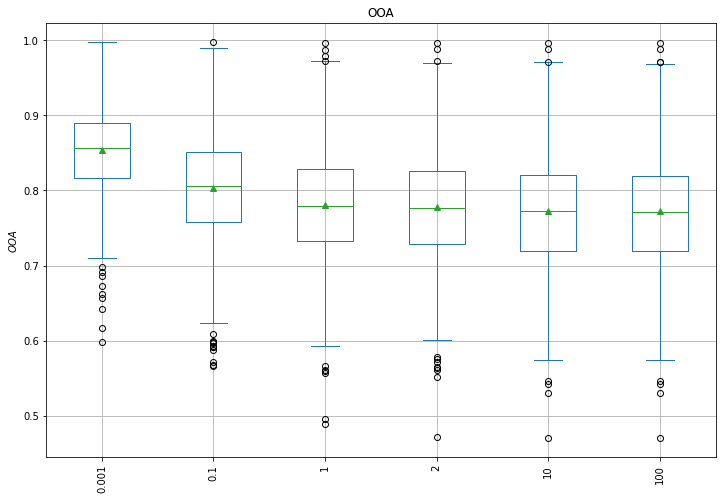

In [5]:
plot_alg_box(dfs=dfs, k_params=k_params, feat="OOA", ylabel=r"$OOA$", print_latex=True, suffixes=["FH04"])
if save_images:
    plt.savefig("cc_vs_fh04_ooa.png", bbox_inches="tight")

\begin{tabular}{lrrrrrr}
\toprule
{} &  0.001 &    0.1 &      1 &      2 &     10 &    100 \\
\midrule
mean & 486.30 & 286.49 & 187.75 & 166.68 & 160.33 & 160.10 \\
std  & 276.15 & 167.35 & 111.91 & 100.51 &  96.61 &  96.43 \\
25\%  & 286.50 & 165.00 & 109.00 &  96.00 &  91.00 &  91.00 \\
50\%  & 436.00 & 255.00 & 166.00 & 147.00 & 139.00 & 139.00 \\
75\%  & 627.00 & 371.00 & 241.00 & 214.00 & 207.00 & 207.00 \\
\bottomrule
\end{tabular}



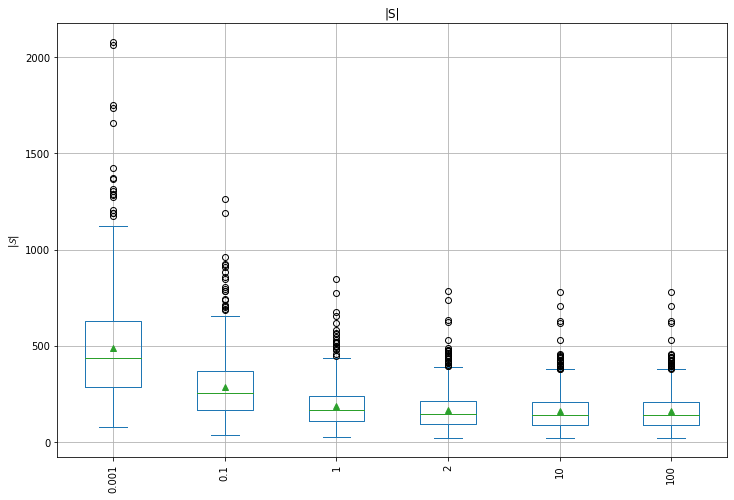

In [6]:
plot_alg_box(dfs=dfs, k_params=k_params, feat="|S|", ylabel=r"$|\mathcal{S}|$", print_latex=True, suffixes=["FH04"])
if save_images:
    plt.savefig("cc_vs_fh04_sizes.png", bbox_inches="tight")

\begin{tabular}{lrrrrrr}
\toprule
{} &  0.001 &    0.1 &      1 &      2 &     10 &    100 \\
\midrule
mean & 0.0000 & 0.0007 & 0.0029 & 0.0041 & 0.0045 & 0.0045 \\
std  & 0.0002 & 0.0034 & 0.0101 & 0.0125 & 0.0134 & 0.0134 \\
25\%  & 0.0000 & 0.0000 & 0.0001 & 0.0002 & 0.0003 & 0.0003 \\
50\%  & 0.0000 & 0.0001 & 0.0004 & 0.0007 & 0.0008 & 0.0008 \\
75\%  & 0.0000 & 0.0002 & 0.0011 & 0.0020 & 0.0023 & 0.0023 \\
\bottomrule
\end{tabular}



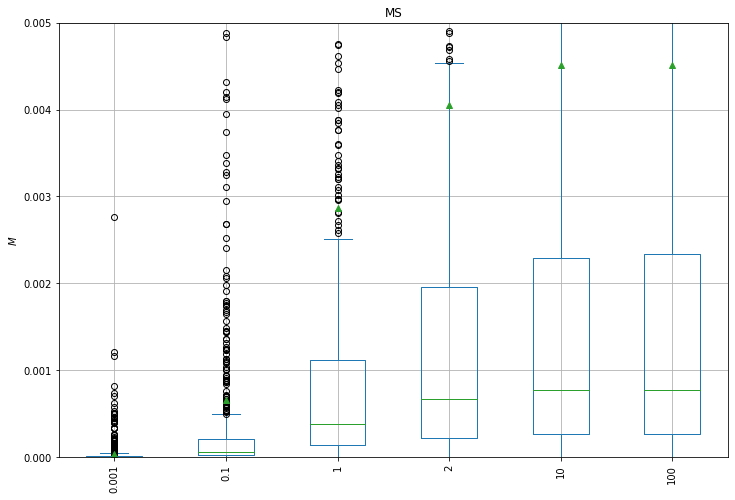

In [8]:
plot_alg_box(dfs=dfs, k_params=k_params, feat="MS", ylabel=r"$M$", print_latex=True,
    suffixes=["FH04"], float_format="%.4f", ylim=[0, 0.005])
if save_images:
    plt.savefig("cc_vs_fh04_ms.png", bbox_inches="tight")